#**Title: Multi-label Text Classification with BERT**



#### Group members: Nitisha Middela, Mitchell Myers

####  Emails: lmiddela@ryerson.ca ; mitchell.myers@ryerson.ca

# **Introduction**
 
#### Problem Description:
 
This paper aims to explore the impact of pre-trained word embeddings and language models on multi-label text classification. In this specific task, by classifying jobs into  categories based on their descriptions, Tran et al.[1] seek to improve the ability of both recruiters and job seekers to find relevant candidates for their open positions, and jobs that fit their experiences, respectively. This task can also be perceived as assigning keywords to jobs. Before moving forward, it must also be noted that, in this paper, these job categories/keywords are referred to as "job titles" but for clarity we will use the terms "categories" or "keywords" instead since the labels are more general than typical job titles.
#### Context of the Problem:
 
In several NLP tasks, pre-trained word embeddings (fastText, ELMO) and language models (XLM-R, BERT and its variations)  have proven to be integral to the success of a classifier. However, the main question Tran et al. focus on in this study is: How effective are they when there are over 60 non-exclusive classes to pick from?
 
Looking through the lense of this particular problem setting, with the development of online job searching and recruitment, the ability for recruiters to find relevant candidates, and job seekers to find the jobs they're looking for has never been easier. However, one of the main ways in which jobs are found is through searching keywords associated with the general industry of interest such as 'Marketing' or 'Real Estate'. Therefore, it is important for recruiters to be aware of what potential categories their job description may fall under or be assoicated to so that they can make sure the appropriate candidates are able to find the posting. Furthermore, being able to classify  and extract potential labels from descriptions could also help recommend potential job types for candidates based on the requirements they are looking to fill.
 
 
#### Limitation About other Approaches:
 
The main difference between this research and its predecessors is that the previous papers focused only on multi class classification where they were trying to predict a single job title/label, whereas this studies multi-label classification where a job description can have more than one relevant option.
 
#### Solution:
 
Our proposed method involves the use of a BERT model to solve this multi-label prediction task. As seen in previous papers and in Tran et al., deep learning NLP models, especially BERT, are able to detect complex relationships within text data and have proven results in multi-label classification tasks[1][4].



# **Background**


| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Lynch[2] | Compared performance of Random Forest and Support Vector Machine (SVM) algorithms on  job title prediction from job description.| Scraped and cleaned dataset from irishjobs.ie | No deep learning models were explored
|  Huynh et al.[3] | Compared performance of various deep learning models and pre-trained word embeddings on job title prediction based on job description. Additionally, a simple ensemble model was proposed for this classification task alongside an application that can recommend a job based on the job searchers skills.| IT job prediction dataset | Single-label classification
|Bhola et, al.[4]| Using BERT language model and a correlation aware bootstrapping process, a deep learning multi-label classification method for extracting relevant job skills based on job description was proposed.|Mycarrersfuture dataset| No real weakness found. However, the model sometimes predicted too many labels.
| Tran et al.[1]| Compared performance of a bidirectional LSTM/GRU ensemble model using different pretrained embeddings and transformer models for multi-label classification of job titles/labels based on their job descriptions. | Scraped, cleaned and standardized from verious job sites| Performance could potentially be improved by adding other job information into learning.





# **Our Contributions**
 
**Dataset Translation** <br>
The original dataset provided by Tran et al. included approximately 22,000 Vietnamese job descriptions with a varying number of job labels associated with each. Our first extension to this paper was translating all descriptions and labels to english to be used in our experiments
<br>
 
**BERT Model Implementation in Prediction Task**<br>
For the prediction task, Tran et al. implemented an ensemble model combining the learning from the Bi-LSTM and Bi-GRU architectures[1], along with pre-trained embeddings or a language model. In our study, we replace this with a transformers based BERT model and compare performance.


# **Methodology**
 
##Data Translation and Preprocessing
 
Prior to experimentation, our first task was to translate the entire dataset from Vietnamese to English. For this, we dropped any unnecessary columns and used the googltrans library to translate the entire dataframe.
 
Translated data example:
 
<p align="center"><img src="https://drive.google.com/uc?id=1IvG7Aui7z-1De_ESXk4AL9XUsZ7QbTYj" alt="Drawing" width ="700" height=""/>
 
To ensure consistency and standardization across all job labels, we mapped similar labels to their standardized versions. For example, [" \'advice\', \'customer service\', \'sales / business\'"] will be mapped to ['Advise', 'Customer service', 'Sales / Business']. Levenshtein distance was used as our similarity measure. Additionally, to deal with class imbalances, any label with fewer than 150 training instances was dropped.
 
##BERT Model
The training set in a multi-label classification issue is made up of examples each of which can be allocated to many categories represented by a set of target labels, and the aim is to predict the label set of test data, for example.
- eg. Job description text might be from any category i.e IT and Software, Architect so for each X we can have output label Y as
[1, 0, 0, 1, 1].
 
To solve this problem BERT was implemented. BERT is superior to other bidirectional models because it uses a bidirectional self-attention mechanism that carries out bidirectional conditioning allowing each word to indirectly "see itself" in a multi-layered context. Other than that, BERT also uses attention masks which pays attention to the part of the sentence which is critical to the classification label. More specifically, for this task bert-base-uncased is used which has a 12-encoder stack all of which are transformer blocks.
 
**Model Pipeline**
 
 
<p align="center"><img src="https://drive.google.com/uc?id=1TRw0L3VUQGrxhrPpaEMGZJQf-HCTH_GH" alt="Drawing" width ="400"/>
 
**Input Data**<br>
The BERT encoder anticipates a token sequence. The processing and conversion of tokens is carried out by inserting the [CLS] token that appears at the start of the first sentence. Each sentence also has a [SEP] token at the end of it. To distinguish between the sentences, we added a segment 'A' or 'B' to the embeddings. To get position embeddings, we also include the position of each token in the sequence.
These features of input data are given below:
 
Token_type_ids:
 - Binary mask which represents where one sentence starts and finishes.<br>
eg. [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]<br>
 
Input_ids:
- Word tokens are converted into input_ids which are understandable by the Model.<br>
eg. [101, 1188, 1110, 170, 1603, 4954, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
 
Attention_mask:
- The attention mask is a binary tensor indicating the position of the padded indices so that the model does not attend to them.<br>
eg. [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 
Targets:
- The list of categories labeled as 0 or 1 in the dataframe.<br>
eg. [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
 
**Activation Function**<br>
We utilize sigmoid() instead of softmax() to get the probabilities in multi-label classification. There is no significant difference between the two in simple binary classification; however, in multinational classification, sigmoid allows for non-exclusive labels (a.k.a. multi-labels), whereas softmax only allows for exclusive classes.
 
**Loss Function**<br>
The loss function is a combination of Binary Cross Entropy and BCELogits, measures the probability error in discrete classification tasks in which each class is independent and not mutually exclusive. This is suitable for multi-label classification problems.
 
 
 
 
**Evaluation Metric**<br>
Macro F1 score was used as the main accuracy measure. F1 score can be calculated as:

<br><p align="center">$F1 = \frac{1}{N}\sum_{i=1}^{N}\frac{2|y_i\bigcap \hat{y}|}{|y_i|+ |\hat{y}|}$

# **Implementation**


# Requirements

* pandas==1.3.5
* python-Levenshtein==0.18.1
* matplotlib==3.5.1
* pytorch version--->1.7.1+cu110
* numpy==1.19.5
* sklearn==1.0.2
* transformers==4.17.0

In [ ]:
pip install Levenshtein

In [ ]:
pip install transformers

In [3]:
import pandas as pd
import Levenshtein
import os
import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig
import matplotlib.pyplot as plt
from collections import Counter
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

# Get Preprocessed and Translated Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.insert(0,'/content/drive/My Drive/MLC/src/')


Mounted at /content/drive


In [5]:
import helper_functions

train_final, test_final, labels = helper_functions.get_processed_data_EN()

# Label Distribution in training and testing datasets

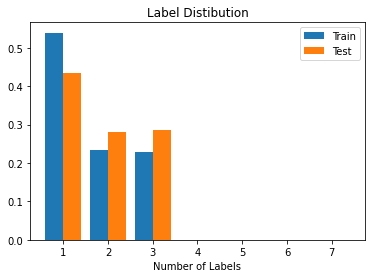

In [6]:
xlabs, train_dist, test_dist = helper_functions.get_labelCount_distributions(train_final, test_final)
plt.bar(xlabs-.2, train_dist, width=.4, label = 'Train')
plt.bar(xlabs+.2, test_dist,width=.4, label = 'Test')
plt.legend(loc='upper right')
plt.title('Label Distibution')
plt.xlabel('Number of Labels')
plt.show()

# Translated and cleaned dataset with label encodings

The get_final_TrainTest function takes the train df, test df and labels and returns two new train and test Dataframes with encoded labels.



In [ ]:
final_train, final_test = helper_functions.get_final_TrainTest(train_final,test_final, labels)
final_train.head(5)

,job_description,encodings
0,. Quality Engineers need to have a deeply kno...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Media Planning: (20%) Plan the digital media ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,- Get a list of top selling locations on the ...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"Managing sales, building promotion programs, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,- Search for selection and proposal quality s...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Model Configuration
1. Maximum Sequence length
2. Training Batch Size
3. Validation Batch Size
4. Epochs for training
5. Learning Rate
6. Tokenizer

In [ ]:
MAX_LEN = 450
TRAIN_BATCH_SIZE = 2
VALID_BATCH_SIZE = 1
EPOCHS = 10
LEARNING_RATE = 1e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.job_description = dataframe.job_description
        self.targets = self.data.encodings
        self.max_len = max_len

    def __len__(self):
        return len(self.job_description)

    def __getitem__(self, index):
        job_description = str(self.job_description[index])
        job_description = " ".join(job_description.split())

        inputs = self.tokenizer.encode_plus(
            job_description,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

# Creating the dataset and dataloader for the Transformers Based BERT

In [ ]:
train_dataset=final_train.sample(frac=1,random_state=200)
train_dataset = train_dataset.reset_index(drop=True)
test_dataset=final_test.sample(frac=1,random_state=200)
test_dataset = test_dataset.reset_index(drop=True)


print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)

train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

TRAIN Dataset: (19911, 2)
TEST Dataset: (2628, 2)


# Model Creation
* Creating the customized model
* Adding a drop out and a dense layer on top of distil bert to get the final output for the model. 
* Output dimention is (768, num_classes)
* A dropout layer for *Regularization*.
* linear layer for *classification*

#Loss Function and Optimizer
* The loss function will be a combination of Binary Cross
Entropy and BCELogits Loss in PyTorch Optimizer.

* To increase the performance of the neural network, the optimizer is utilised to adjust the weights.

In [ ]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.l2 = torch.nn.Dropout(0.3)
        self.l3 = torch.nn.Linear(768, 68)
    
    def forward(self, ids, mask, token_type_ids):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids, return_dict=False)
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output

model = BERTClass()
model.to(device)

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

# Training Loop
* The dataloader sends data to the model in batches of a certain size.
* The weights of the neurons in the network are optimised using the loss value.
* To determine the loss, the model's subsequent output and the actual category are compared.
* The loss value is reported in the console after every 50 steps.

In [ ]:
def train(epoch, loss_numb):
    model.train()
    for _,data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)
        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        #display loss after every 50 iterations
        if _%50==0:
            print(f'Epoch: {epoch}/{EPOCHS}, Loss:  {loss.item()}', _)
            loss_numb.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss_numb

EPOCH = []
loss_numb = []
for epoch in range(EPOCHS):
    EPOCH.append(epoch)
    loss_numb = train(epoch, loss_numb)
torch.save(model,'trained_model_final_test.pt')

# Plotting Training Curve

Text(0.5, 1.0, 'Training Curve')

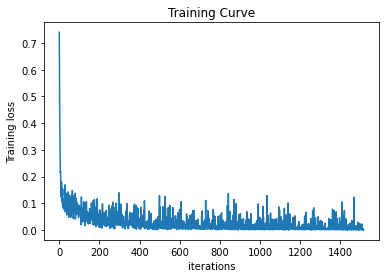

In [ ]:
from matplotlib import pyplot as plt
plt.plot(list(range(0, len(loss_numb))), loss_numb, label =  'training loss curve')
plt.xlabel("iterations")
plt.ylabel("Training loss")
plt.title("Training Curve")

# Inference


If using provided model weights then run the below cell

In [ ]:
model = torch.load("trained_model_final.pt" )

In [ ]:
def inference():
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            if (_%1000) == 0:
                print("Inferred examples number =  ", _)
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
            list_output = torch.sigmoid(outputs[0]).cpu().detach().numpy().tolist()
    return fin_outputs, fin_targets
model = torch.load("trained_model_final.pt")
results = []
f_outputs, f_targets = inference()
outputs = np.array(f_outputs) >= 0.5 
targets = np.array(f_targets) == 1

for i in range(len(outputs)):
    pred = labels.job_type[outputs[i]].values.tolist()
    gt = labels.job_type[targets[i]].values.tolist()
    results.append([pred, gt])

#Example Predictions

In [ ]:
example_preds = pd.DataFrame(columns = ['Ground Truth Job Labels', 'Predicted Job Labels'])
for pred, gt in results[:10]:
  example_preds = example_preds.append({'Ground Truth Job Labels':gt,'Predicted Job Labels':pred }, ignore_index=True)
example_preds

,Ground Truth Job Labels,Predicted Job Labels
0,[IT - Hardware / Network],[IT - Hardware / Network]
1,"[Mechanical / Automotive / Automation, Fine Ar...",[Architecture]
2,"[Maintenance / Repair, Mechanical / Automotive...","[Maintenance / Repair, Mechanical / Automotive..."
3,"[Maintenance / Repair, Electrical / Electronic...",[Maintenance / Repair]
4,[Accounting and auditing],[Accounting and auditing]
5,"[Finance / Investment, Advise]","[Finance / Investment, Advise]"
6,[Marketing / Marketing],"[IT - Software, Fine Arts / Art / Design]"
7,"[Translation, Insurance, Finance / Investment]","[Insurance, Finance / Investment, Advise]"
8,"[Translation, Customer service, Finance / Inve...","[Translation, Customer service, Finance / Inve..."
9,"[Maintenance / Repair, Mechanical / Automotive...","[Maintenance / Repair, Mechanical / Automotive..."


# Post Processing Results

* Data is post processed using following method.
     * If ground truth is [a , b ,c] and prediction is [a , b , d]
     * Then ground truth witll be [1, 1, 1] and prediction maps to [1, 1, 0] since insted of "c" in the ground truth model predicted "d". 
     

In [ ]:
over_all_pred = []
over_all_gt = []
for i in results:
    number_of_correct = []
    for j in i[0]:
        if j in i[1]:
          number_of_correct.append(1)
    
    over_all_pred.append(number_of_correct)
    over_all_gt.append([1]*len(i[1]))
    
match_diff0 = []
match_diff1= []
match_diff2 = []

for idx, ii in enumerate(over_all_pred):
    
    sum_pred = sum(ii)
    sum_gt = sum(over_all_gt[idx])
    
    if abs(sum_pred - sum_gt) == 0 :
        match_diff0.append(1)
        match_diff1.append(1)
        match_diff2.append(1)

    elif (sum_pred-sum_gt == 1 or sum_pred-sum_gt == -1) and sum_pred!=0:
        match_diff0.append(0)
        match_diff1.append(1)
        match_diff2.append(1)

    elif (sum_pred-sum_gt == 2 or sum_pred-sum_gt == -2) and sum_pred!=0:
        match_diff0.append(0)
        match_diff1.append(0)
        match_diff2.append(1)
        
    else:
        match_diff0.append(0)
        match_diff1.append(0)
        match_diff2.append(0)               

# Performance Metrics with complete match
* if there is a complete match, prediction will be counted as correct<br>**For Example**<br>**Ground Truth**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Prediction** <br>
&nbsp;&nbsp;&nbsp;&nbsp;[a, b] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[a, b]<br>
&nbsp;&nbsp;&nbsp;&nbsp;[g, f, m] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[g, f, m]<br>
&nbsp;&nbsp;&nbsp;&nbsp;[a, b, e, f] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[a, b, e, f]<br>

In [ ]:
accuracy_comp = metrics.accuracy_score(match_diff0, [1]*len(match_diff0))
f1_score_micro_comp = metrics.f1_score(match_diff0, [1]*len(match_diff0), average='micro')
f1_score_macro_comp = metrics.f1_score(match_diff0, [1]*len(match_diff0), average='macro')
print(f"Accuracy Score = {accuracy_comp}")
print(f"F1 Score (Micro) = {f1_score_micro_comp}")
print(f"F1 Score (Macro) = {f1_score_macro_comp}")

Accuracy Score = 0.7385844748858448
F1 Score (Micro) = 0.7385844748858447
F1 Score (Macro) = 0.4248194353250164


# Performance metric if one label is misclassified
* if there is at most one misclassification, prediction will be counted as correct<br>**For Example**<br>**Ground Truth**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Prediction** <br>
&nbsp;&nbsp;&nbsp;&nbsp;[a, b] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[a, c]<br>
&nbsp;&nbsp;&nbsp;&nbsp;[g, f, l] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   [g, f, m]<br>
&nbsp;&nbsp;&nbsp;&nbsp;[a, b, k, f] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[a, b, e, f]<br>

In [ ]:
accuracy_miss1 = metrics.accuracy_score(match_diff1, [1]*len(match_diff1))
f1_score_micro_miss1 = metrics.f1_score(match_diff1, [1]*len(match_diff1), average='micro')
f1_score_macro_miss1 = metrics.f1_score(match_diff1, [1]*len(match_diff1), average='macro')
print(f"Accuracy Score = {accuracy_miss1}")
print(f"F1 Score (Micro) = {f1_score_micro_miss1}")
print(f"F1 Score (Macro) = {f1_score_macro_miss1}")

Accuracy Score = 0.8580669710806698
F1 Score (Micro) = 0.8580669710806698
F1 Score (Macro) = 0.4618062666393611


# Performance metric if two labels misclassified
* If there is at most two misclassifications, prediction will be counted as correct<br>**For Example**<br>**Ground Truth**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Prediction** <br>
&nbsp;&nbsp;&nbsp;&nbsp;[a, b, c,d] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[a, b]<br>
&nbsp;&nbsp;&nbsp;&nbsp;[g, j, k] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[g, f, m]<br>
&nbsp;&nbsp;&nbsp;&nbsp;[h, t, e, f] &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[a, b, e, f]<br>

In [ ]:
accuracy_miss2 = metrics.accuracy_score(match_diff2, [1]*len(match_diff2))
f1_score_micro_miss2 = metrics.f1_score(match_diff2, [1]*len(match_diff2), average='micro')
f1_score_macro_miss2 = metrics.f1_score(match_diff2, [1]*len(match_diff2), average='macro')
print(f"Accuracy Score = {accuracy_miss2}")
print(f"F1 Score (Micro) = {f1_score_micro_miss2}")
print(f"F1 Score (Macro) = {f1_score_macro_miss2}")

Accuracy Score = 0.8812785388127854
F1 Score (Micro) = 0.8812785388127854
F1 Score (Macro) = 0.46844660194174753


In [ ]:
performance_df = pd.DataFrame(index = ['Complete Match', 'One Misclassification', 'Two Misclassifications'],\
                              columns = ['Accuracy Score (%)', 'F1 Score (Macro)(%)'])
performance_df.loc['Complete Match'] = [accuracy_comp, f1_score_macro_comp]
performance_df.loc['One Misclassification'] = [accuracy_miss1, f1_score_macro_miss1]
performance_df.loc['Two Misclassifications'] = [accuracy_miss2, f1_score_macro_miss2]



# Model Performance Table

In [ ]:
performance_df.astype(float).round(4) * 100

,Accuracy Score (%),F1 Score (Macro)(%)
Complete Match,73.86,42.48
One Misclassification,85.81,46.18
Two Misclassifications,88.13,46.84


# **Conclusion and Future Direction**

As we can see from the macro F1 scores, and as Tran et al. found in their experiments, performance is not optimized in the classification task and it can be further improved upon. With a diffiuclt task like multi-label classification and with over 60 potential classes to predict, more information than just the job desciption may be required to achieve higher accuracy. An interesting next step could be to inculde additional data on the job such as: salary, skills required, and position level (intern, associate, executive, etc...). 


# References:

[1]  Tran, H. T., Vo, H. H. P., & Luu, S. T. (2021). Predicting Job Titles from Job Descriptions with Multi-label Text Classification. arXiv preprint arXiv:2112.11052.

[2]  Lynch, J. (2017) An Analysis of Predicting Job Titles Using Job Descriptions, Masters Dissertation, Technological University Dublin.

[3] Van Huynh, T., Van Nguyen, K., Nguyen, N. L. T., & Nguyen, A. G. T. (2020, October). Job prediction: From deep neural network models to applications. In 2020 RIVF International Conference on Computing and Communication Technologies (RIVF) (pp. 1-6). IEEE.

[4] Bhola, A., Halder, K., Prasad, A., & Kan, M. Y. (2020, December). Retrieving skills from job descriptions: A language model based extreme multi-label classification framework. In Proceedings of the 28th International Conference on Computational Linguistics (pp. 5832-5842).